In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

In [2]:
lambda_=0.3
radius=1
sigma=0.1
C0=0.8
B=2e+6

angles=np.array([92.3, 225.3])/360*2*np.pi
r0=radius*np.array([np.cos(angles),np.sin(angles)])
r0

array([[-0.04013179, -0.7033947 ],
       [ 0.9991944 , -0.71079947]])

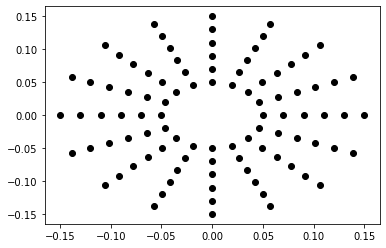

In [3]:
p=np.zeros([96,2])
for j,r in enumerate([0.05,0.07,0.09,0.11,0.13,0.15]):
    for i in range(16):
        alpha_i=i/16*np.pi*2
        p[i+j*16]=r*np.array([np.cos(alpha_i),np.sin(alpha_i)])
plt.plot(p[:,0],p[:,1],'ko')
plt.show()

In [4]:
p.shape,r0.shape

((96, 2), (2, 2))

In [5]:
Theta=20/360*2*np.pi
sigma=np.sqrt(2-2*np.cos(Theta))*radius
ampli=np.exp(-2*(np.pi**2)*(sigma**2)*(np.linalg.norm(p,axis=1)**2)).reshape((-1,1))
print(ampli.shape)
w=np.multiply(ampli,np.exp(-1j*2*np.pi*np.dot(p,r0)/(radius*lambda_)))
w=w/np.sqrt(np.sum(abs(w)**2,axis=0))
w=np.sum(w,axis=1)
w=w/np.sqrt(np.sum(abs(w)**2))
w.shape

(96, 1)


(96,)

In [6]:
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=radius*np.array([np.cos(thetas),np.sin(thetas)])
r.shape

(2, 10000)

In [7]:
b_gain=abs((np.exp(1j*2*np.pi*np.dot(p,r)/(radius*lambda_))).T@w)
b_gain.shape

(10000,)

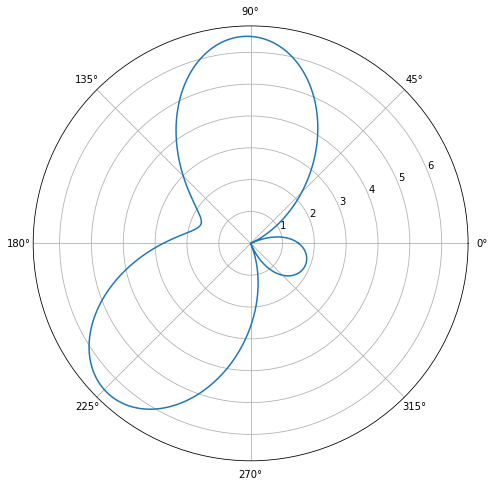

In [8]:
plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()

In [30]:
data=io.loadmat('data/data_1.mat')
directions=data['directions']
xyz=data['xyz']
src=data['src_model']
weights=data['weights']
Thetas=data['Theta']
directions.shape,Thetas.shape,weights.shape

((10, 2), (10, 2), (10, 2))

In [31]:
a=np.sum(data['weights'],axis=1).shape

In [32]:
lambda_ = 0.336845458426966
C0 = 0.8
B = 2e6 
N=src.shape[0]
r=src[:,0:2].T
Theta=10/360*2*np.pi
sigma=np.sqrt(2-2*np.cos(Theta))
noise=0.1
r.shape,src.shape

((2, 121), (121, 3))

In [33]:
R_user = np.zeros((directions.shape[0],src.shape[0]))
R_user.shape

(10, 121)

In [34]:
gains=[]
for i in range(directions.shape[0]):
    angle=directions[i].reshape(-1)/360*2*np.pi
    r0=np.array([np.cos(angle), np.sin(angle)])
    Theta=Thetas[i].reshape(-1)*2*np.pi/360
    sigma=np.sqrt(2-2*np.cos(Theta))
    ampli=np.exp(-2*(np.pi**2)*np.dot((np.linalg.norm(xyz,axis=1)**2).reshape((-1,1)),(sigma**2).reshape((1,-1))))
    w=np.multiply(ampli,np.exp(-1j*2*np.pi*np.dot(xyz,r0)/(lambda_)))
    w=w/np.sqrt(np.sum(abs(w)**2,axis=0))
    w=np.sum(w,axis=1)
    w=w/np.sqrt(np.sum(abs(w)**2))
    b_gain=abs((np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_))).T@w)
    for k in range(N):
        R_user[i,k]=B*np.log2(1+(b_gain[i]**2/2)/noise*C0)
R_aver=np.mean(R_user)/N
R_aver

71073.58893996874

In [35]:
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=np.array([np.cos(thetas),np.sin(thetas)])
i=0

angle=directions[i].reshape(-1)/360*2*np.pi
r0=np.array([np.cos(angle), np.sin(angle)])
Theta=Thetas[i].reshape(-1)*2*np.pi/360
sigma=np.sqrt(2-2*np.cos(Theta))
ampli=np.exp(-2*(np.pi**2)*np.dot((np.linalg.norm(xyz,axis=1)**2).reshape((-1,1)),(sigma**2).reshape((1,-1))))
w=np.multiply(ampli,np.exp(-1j*2*np.pi*np.dot(xyz,r0)/(lambda_)))
w=w/np.sqrt(np.sum(abs(w)**2,axis=0))
w=np.sum(w,axis=1)
w=w/np.sqrt(np.sum(abs(w)**2))
b_gain=abs((np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_))).T@w)
b_gain.shape,weights[i],directions[i],Thetas[i]

((10000,),
 array([16.48567803, 35.21860276]),
 array([ 92.3, 225.3]),
 array([14.02998362, 54.83234333]))

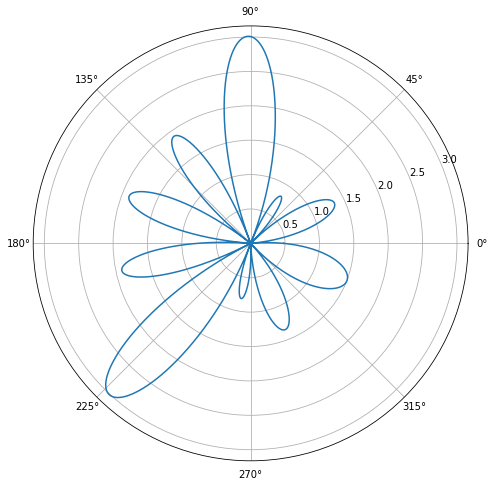

In [36]:
plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()

In [23]:
data=io.loadmat('data/data_2.mat')
directions=data['directions'][0]
xyz=data['xyz']
src=data['src_model']
weights=data['weights'][0]
Thetas=data['Theta'][0]
lambda_ = 0.336845458426966
sigma = 0.1
C0 = 0.8
B = 2e6 
N=src.shape[0]
r=src[:,0:2].T
R_user = []
r.shape
directions.shape,Thetas.shape,weights.shape

((10,), (10,), (10,))

In [24]:
R_user = np.zeros((directions.shape[0],src.shape[0]))
R_user.shape

(10, 121)

In [25]:
gains=[]
for i in range(directions.shape[0]):
    angle=directions[i].reshape(-1)/360*2*np.pi
    r0=np.array([np.cos(angle), np.sin(angle)])
    Theta=Thetas[i].reshape(-1)*2*np.pi/360
    sigma=np.sqrt(2-2*np.cos(Theta))
    ampli=np.exp(-2*(np.pi**2)*np.dot((np.linalg.norm(xyz,axis=1)**2).reshape((-1,1)),(sigma**2).reshape((1,-1))))
    w=np.multiply(ampli,np.exp(-1j*2*np.pi*np.dot(xyz,r0)/(lambda_)))
    w=w/np.sqrt(np.sum(abs(w)**2,axis=0))
    w=np.sum(w,axis=1)
    w=w/np.sqrt(np.sum(abs(w)**2))
    b_gain=abs((np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_))).T@w)
    for k in range(N):
        R_user[i,k]=B*np.log2(1+(b_gain[i]**2/2)/noise*C0)
R_aver=np.mean(R_user)/N
R_aver

80429.96433272968

In [28]:
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=np.array([np.cos(thetas),np.sin(thetas)])
i=0
angle=directions[i].reshape(-1)/360*2*np.pi
r0=np.array([np.cos(angle), np.sin(angle)])
Theta=Thetas[i].reshape(-1)*2*np.pi/360
sigma=np.sqrt(2-2*np.cos(Theta))
ampli=np.exp(-2*(np.pi**2)*np.dot((np.linalg.norm(xyz,axis=1)**2).reshape((-1,1)),(sigma**2).reshape((1,-1))))
w=np.multiply(ampli,np.exp(-1j*2*np.pi*np.dot(xyz,r0)/(lambda_)))
w=w/np.sqrt(np.sum(abs(w)**2,axis=0))
w=np.sum(w,axis=1)
w=w/np.sqrt(np.sum(abs(w)**2))
b_gain=abs((np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_))).T@w)
b_gain.shape,weights[i],directions[i]

((10000,), array([[18.6966719 , 32.66385462]]), array([[ 88.7, 231.6]]))

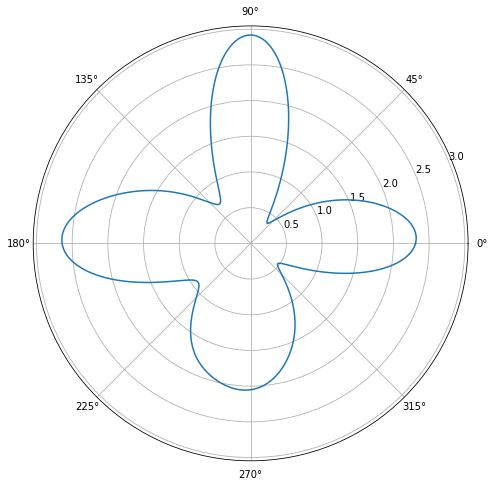

In [29]:
plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()